In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
ctlg_dir = '../../../data/catalogues'

labels_path = f'{ctlg_dir}/gaia-sdss/cross-match-labels.csv'

In [3]:
labels_df = pd.read_csv(labels_path)
labels = labels_df['best_class_name_gaia'].values

In [4]:
def bar_plot(labels, norm=False, xticks=True):
    names, counts = np.unique(labels, return_counts=True)
    if norm:
        counts = counts/sum(counts)
    colors = sns.color_palette('tab10')
    colors = colors[:len(names)]
    plt.bar(names, counts, color=colors)
    _, xlabels = plt.xticks()
    if xticks:
        plt.setp(xlabels, rotation=60)
    else:
        plt.xticks([], [])
        
    if not norm:
        plt.title('Gaia DR2/SDSS DR14 Cross-match Label Distribution')
        plt.ylabel('Counts')
    else:
        plt.title('Gaia DR2/SDSS DR14 Cross-match Normalized Label Distribution')
        plt.ylabel('Percentage %')

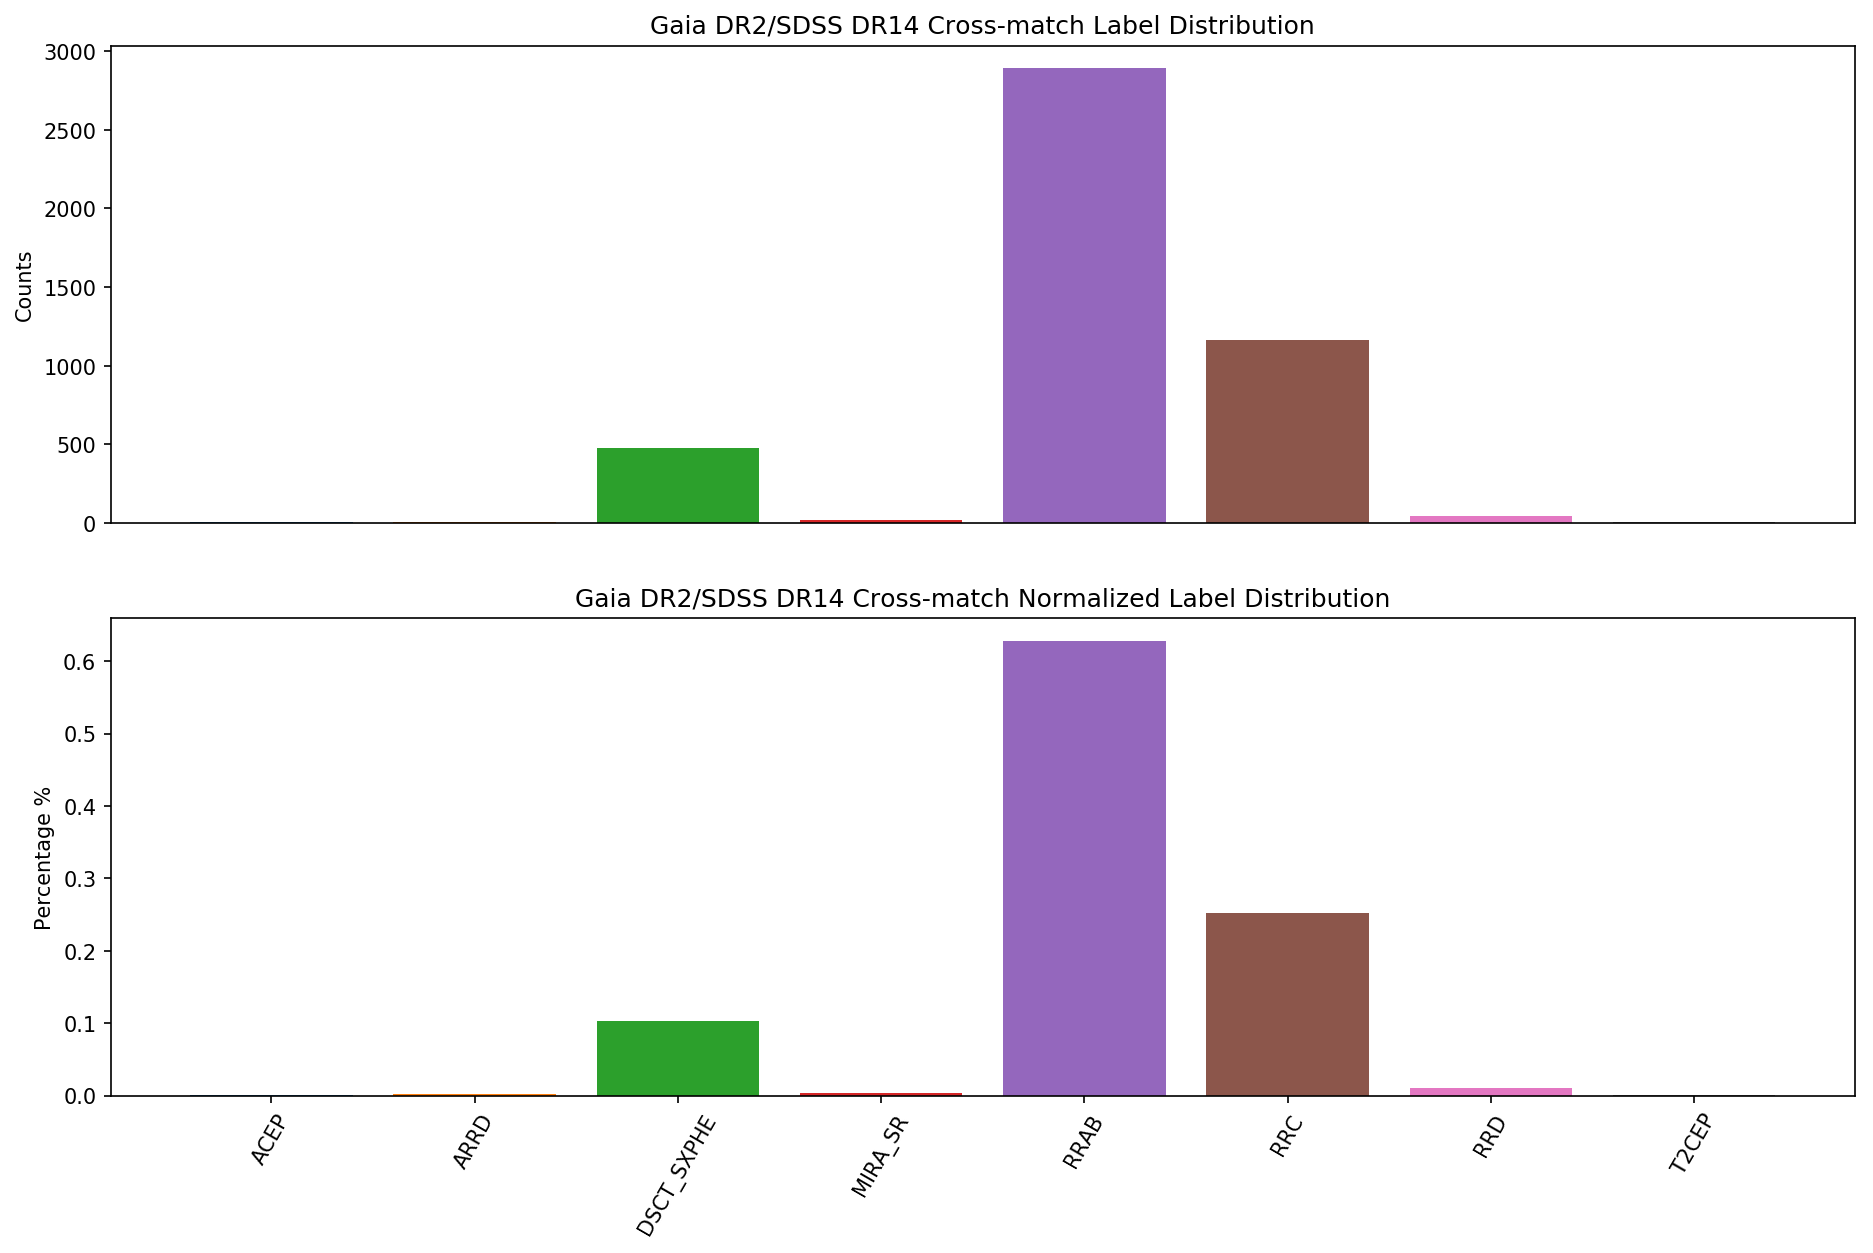

In [5]:
fig = plt.figure(figsize=(15,8), dpi=150)
ax = fig.add_subplot(211)
bar_plot(labels, norm=False, xticks=False)
ax = fig.add_subplot(212)
bar_plot(labels, norm=True, xticks=True)
plt.subplots_adjust(top=1)
plt.show()

In [6]:
vals, counts = np.unique(labels, return_counts=True)
dict(zip(vals, counts))

{'ACEP': 3,
 'ARRD': 8,
 'DSCT_SXPHE': 473,
 'MIRA_SR': 16,
 'RRAB': 2892,
 'RRC': 1163,
 'RRD': 46,
 'T2CEP': 6}

In [7]:
labels.shape[0]

4607

Eliminate small classes

In [8]:
thres = sum(counts)*0.005
keep = counts > thres
dict(zip(vals[keep], counts[keep]))

{'DSCT_SXPHE': 473, 'RRAB': 2892, 'RRC': 1163, 'RRD': 46}

## Classification confidence

In [9]:
labels_path = f'{ctlg_dir}/gaia/gaia-vari-classifier-result.csv'
labels_x_path = f'{ctlg_dir}/gaia-sdss/cross-match-labels.csv'

In [10]:
labels = pd.read_csv(labels_path)
labels_x = pd.read_csv(labels_x_path)

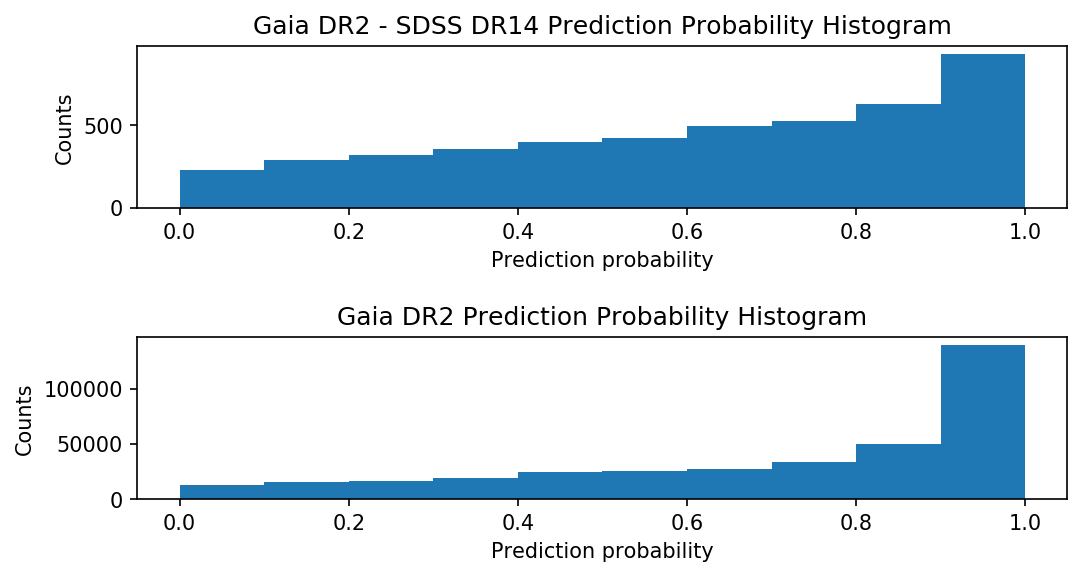

In [11]:
plt.figure(figsize=(8,4), dpi=150)
ax = plt.subplot(211)
ax.hist(labels_x.best_class_score_gaia)
ax.set_title('Gaia DR2 - SDSS DR14 Prediction Probability Histogram')
ax.set_ylabel('Counts')
ax.set_xlabel('Prediction probability')

ax = plt.subplot(212)
ax.hist(labels.best_class_score)
ax.set_title('Gaia DR2 Prediction Probability Histogram')
ax.set_ylabel('Counts')
ax.set_xlabel('Prediction probability')

plt.subplots_adjust(hspace=0.8)

plt.show()